# Introduction au deep learning
<!--
Introduction à pytorch 
Reference: https://pytorch.org/tutorials/beginner/basics/intro.html
utile pour moi pour Markdown https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#emphasis
-->

In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


## Introduction aux Tenseurs
But: Se familiariser avec les tenseurs et pytorch

**Q1:** Telechargez le dataset MNIST 

Aidez vous de la reference suivante 
https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html


Creez une variable dataset qui contient le dataset MNIST. 
Que contient ce jeux de donnée? 
Affichez img=dataset[0][0]


5


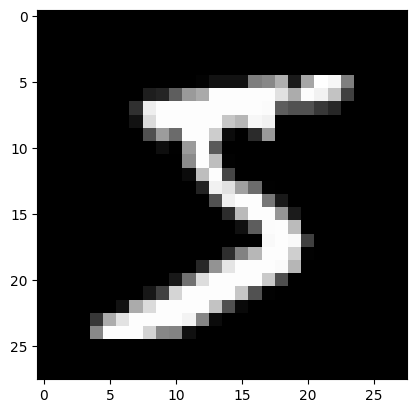

In [12]:
dataset = datasets.MNIST('./dataset', download=True)
img = dataset[0][0]

print(dataset[0][1])
plt.imshow(img, cmap='gray')

#### Images, tenseurs...?
Une image est une matrice qui dans chacune de ses entrées un vecteur de dimension 3 correspondant à des intensités de RGB (Rouge, vert, bleu). Numériquement une image se représente comme un tableau avec trois dimensions: un tenseur de taille 3

<img src="mediumtensors.webp" alt="Alternative text" />

Image prise de https://medium.com/@schartz/the-shape-of-tensor-bab75001d7bc


**Q2:** Utiliser transforms.PILToTensor() pour convertir img en tenseur. Quelle est la forme du tenseur? A quoi correspondent les valeurs affichées? 

Vous pouvez vous aider des liens suivants pour la conversion
https://pytorch.org/vision/stable/generated/torchvision.transforms.PILToTensor.html
https://discuss.pytorch.org/t/pytorch-pil-to-tensor-and-vice-versa/6312

et de cela pour la forme de
https://pytorch.org/docs/stable/generated/torch.Tensor.size.html
ou de .shape

In [76]:
img_tensor = transforms.PILToTensor()(img).flatten().float()
print(img_tensor.shape)
print(img_tensor.size())

torch.Size([784])
torch.Size([784])


#### Définition formelle de tenseurs et contraction
Mathématiquement, des tenseurs de taille K sont des tableaux
$$t:[1,n_1]\times [1,n_2]\times \ldots \times [1,n_K]\to \mathbb{R}$$
Ils sont notés $t_{i_1i_2\ldots i_K}$ avec $i_1\in [1,n_1]$, $i_2\in [1,n_2]$, $\ldots$, $i_K\in [1,n_K]$.
Une matrice est un cas particulier des tenseurs $M:[1,n_1]\times [1,n_2]\to \mathbb{R}$.

La généralisation de la multiplication matricielle est la multiplication des tenseurs. Deux tenseurs $t^{(1)}$ et $t^{(2)}$ de taille respective $K_1$ et $K_2$ se multiplient sur un de leurs indices respectifs $I_1$ et $I_2$ de la façon suivante:

$$ t^{(1)}.t^{(2)}= \sum_{\alpha \in [1,n_{I_1}^{(1)}]}t_{i_1.. \alpha.. i_K}^{(1)}t_{i_1.. \alpha.. i_K}^{(2)}$$

quand $n_{I_1}^{(1)}=n_{I_2}^{(2)}$. $t^{(1)}.t^{(2)}$ is of size $K_1-1+K_2-1$.

Cette multiplication s'étend à des collections d'indices:


$$ t^{(1)}.t^{(2)}= \sum_{\alpha,\beta \in [1,n_{I_1}^{(1)}]\times [1,n_{J_1}^{(1)}]}t_{i_1.. \alpha\beta .. i_K}^{(1)}t_{i_1.. \alpha\beta .. i_K}^{(2)}$$


**Q3:** Definir un tenseur de forme [1,3,3,3] ne contenant que des 1.
Definir un tenseur de forme [1,3,3,3] ne contenant que des 0
Fait la multiplication sur la dernière coordonnée du premier tenseur et la dernière composante du deuxième
Faire de meme pour la deuxieme du premier et la troisieme du deuxieme.

Vous pouvez vous aider des liens suivants:
https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html
https://pytorch.org/docs/stable/generated/torch.tensordot.html
https://pytorch.org/docs/stable/generated/torch.einsum.html    

In [25]:
t1 = torch.ones(1, 3, 3, 3)
t2 = torch.zeros(1, 3, 3, 3)

print(torch.tensordot(t1, t2, dims=([-1], [-1])).shape)
print(torch.tensordot(t1, t2, dims=([1], [2])).shape)

torch.Size([1, 3, 3, 1, 3, 3])
torch.Size([1, 3, 3, 1, 3, 3])


## Back propagation... pour un réseau à deux couches

Reference: https://duchesnay.github.io/pystatsml/deep_learning/dl_backprop_numpy-pytorch-sklearn.html

But: Créez un réseau neuronal ReLU entièrement connecté avec une seule couche cachée, où toutes les connexions sont pleinement connectées et sans termes de biais. Entraînez le réseau à prédire la sortie $y$ à partir de l'entrée $x$ en utilisant l'erreur euclidienne.
    

Nous considérons un réseau à deux couches $f_{NN}$ avec comme poids deux matrices $W^{1},W^{2}$ qui 
    
$$Y=W^{(2)}max(W^{(1)}X,0)$$

avec $W^{(2)}\in M_{n,m}(\mathbb{R})$ and $W^{(1)}\in M_{m,k}(\mathbb{R})$. Les vecteurs de biais sont supposé être nuls. 

Dans une tâche de classification (*Apprentissage supervisé*), le jeu de données est constitué de signaux d'entrée $X$, pour MNIST des images, et de labels. Pour MNIST, le label représente le nombre associé à l'image. Un réseau de neurones est utilisé pour approximer $P(Y\vert X)$.

### Implémenter un réseau de neurones à deux couches 

**Q4a:** Définir une fonction TwoLayer($W^{(1)},W^{(2)}$): torch.Tensor[1,28,28] $\to$ torch.Tensor[9] qui prend une image en entrée et renvoie une quantité proportionnelle à des probabilités d'être dans une des classes. 

Aide trouver les bonne dimensions des matrices $n,m,k$: TwoLayer: torch.Tensor[n,m]$\times$ torch.Tensor[m,k]$\times$ torch.Tensor[1,28,28] $\to$ torch.Tensor[9]



In [77]:
def two_layer(weights1: torch.Tensor, weights2: torch.Tensor, x: torch.Tensor):
  return weights2 @ torch.nn.ReLU()(weights1 @ x)

**Q4b:** Tester votre reseau en choisissant des matrices de poids aléatoires sur quelques images de MNIST. Proposez une 
méthode pour associer à une image une classe à partir de la sortie de votre réseau de neurone ainsi qu'une densité de probabilité
sur les classes possibles. 

Aide: 
- tenseurs choisis aléatoirement https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html
- règle de decision: Max-Pooling, softmax

In [59]:
m = 12
weights1 = torch.rand((m, 28 * 28))
weights2 = torch.rand((10, m))

two_layer(weights1, weights2, img_tensor)

tensor([ 90461.0156, 120537.2656,  60851.1719,  92025.2500, 120722.7656,
         88467.5781,  86849.8750,  66228.4531,  67731.3594,  78733.7344])

**Q5** Calculez la matrice jacobienne de 
 $$f(X)=W^{(2)}max(W^{(1)}X,0)$$
 
 et implémentez une fonction gradTwoLayer qui calcul cette matrice

In [104]:
def grad_two_layer(weights1: torch.Tensor, weights2: torch.Tensor, tensor: torch.Tensor):
  # print(torch.eye(weights1.shape[0]).shape)
  # print(tensor.shape)
  # print(torch.nn.ReLU()(torch.eye(weights1.shape[0])[:,None,:] * tensor[None, :, None]).shape)
  # print(weights2[:, None, None, :].shape)

  return (
    torch.einsum(
      'ji, ikl -> jkl',
      weights2,
      nn.ReLU()(torch.eye(weights1.shape[0])[:, None, :] * tensor[None, :, None]),
    ),
    torch.eye(weights2.shape[0])[:, None, :] * nn.ReLU()(weights1 @ tensor)[None, :, None]
  )

x = grad_two_layer(weights1, weights2, img_tensor)
print(x[0].shape)
print(x[1].shape)

torch.Size([10, 784, 12])
torch.Size([10, 12, 10])


### Trouver une *bonne* fonction d'objectif à minimiser


**Q6a** En vous rappelant du principe de maximum de vraissemblance vu dans les cours précédents, quelle fonction d'objectif (loss) proposeriez-vous pour trouver le réseau de neurone qui approche le mieux $P(Y\vert X)$ sur le jeu de données de MNIST $(X_i,Y_i, i\leq 60000)$.
Elle sera de la forme 
$$C(W^{(2)},W^{(1)})=\sum_{i\in I} l(f(X_i),Y_i)$$

Aide:
- Cherchez ce qu'est le softmax [ici](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html).
- Cross-entropie [ici](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).
    

In [ ]:
def loss(x: torch.Tensor):
  return nn.CrossEntropyLoss()(nn.Softmax(two_layer(weights1, weights2, x)))

**Q6b** Implémenter le gradient de C en vous aidant des questions précédentes (**Q5**)

Aide: pensez à implémenter le gradient de $l(f(X_i),Y_i)$ puis à sommer ce gradient sur le jeu de donnée.

### Descente de gradient

**Q7a** Implémenter ce gradient et écrire une descente de gradient sur le jeu de donnée MNIST. 

**Q7a**  Tester les poids obtenus


## Back propagation... pour un réseau à trois couches? 

**Q8a** Reprendre le meme exercice pour un reseau à 3 couches

**Q8b** Comparez les resultats obtenus par rapport au réseau à deux couches

## Back propagation!

La backpropagation généralise le calcul du gradient d'un réseau de neurones à $n$ couches. Lisez la dernière page du chapitre 2 de votre cours pour apprendre comment cela est fait.

Vous pouvez également lire [ce lien](http://neuralnetworksanddeeplearning.com/chap2.html). L'algorithme est rappelé ci-dessous, les images étant tirées de la référence précédente.


<img src="tikz21.png" alt="Alternative text" />

<img src="backpropagation-algorithm.png" alt="Alternative text" />

**Q9** Implémentez le calcul du gradient d'un réseau à $n$ couches en utilisant la backpropagation.







**Q10** Implémentez la descente de gradient pour la loss de la question **Q6a** en utilisant la backpropagation.

Votre code sera de la forme:

```python
for epoch in range(epochs):
    for image in dataset: 
        calcul du gradient de l
        calcul de la jacobienne du réseau de neurones appliqué à l'image 
  ```       
        i.e. $f_{NN}(image)$ <--> algorithme de backpropagation
   ``` 
        calcul du gradient de $l \circ f_{NN}(image)$
    somme des gradients pour chaque image
    mise à jour des poids du réseau par backpropagation
 ``` 

**Q11** Ouvrez nn_tutorial.ipynb pris de https://pytorch.org/tutorials/beginner/nn_tutorial.html